In [1]:
from dds.configs.config import set_task, get_config
from dds.train_dds import train_dds


import numpy as onp

In [2]:
opt_funnel = {
    'funnel': {
        '32': {
            'oudstl': {
                'sigma': 1.075,
                'alpha': 1.075,
                'm': None
            },
            'pisstl': {
                'sigma': 1.0675000000000001,
                'alpha': 1.0,
                'm': None
            },
            'oududmp': {
                'sigma': 1.85,
                'alpha': 1.67,
                'm': 0.9
            }
        },
        '64': {
            'oudstl': {
                'sigma': 1.075,
                'alpha': 0.6875,
                'm': None
            },
            'pisstl': {
                'sigma': 0.4158333333333334,
                'alpha': 1.0,
                'm': None
            },
            'oududmp': {
                'sigma': 1.85,
                'alpha': 3.7,
                'm': 0.9
            }
        },
        '128': {
            'oudstl': {
                'sigma': 1.85,
                'alpha': 0.3,
                'm': None
            },
            'pisstl': {
                'sigma': 0.7416666666666667,
                'alpha': 1.0,
                'm': None
            },
            'oududmp': {
                'sigma': 1.075,
                'alpha': 2.5,
                'm': 0.9
            }
        },
        '256': {
            'oudstl': {
                'sigma': 1.4625000000000001,
                'alpha': 0.3,
                'm': None
            },
            'pisstl': {
                'sigma': 0.2529166666666667,
                'alpha': 1.0,
                'm': None
            },
            'oududmp': {
                'sigma': 0.6875,
                'alpha': 3.7,
                'm': 0.9
            }
        }
    }
}

In [3]:
funnel_config = get_config()

# Time and step settings (Need to be done before calling set_task)
funnel_config.model.tfinal = 1.6
funnel_config.model.dt = 0.05

if funnel_config.model.reference_process_key == "oudstl":
    funnel_config.model.step_scheme_key = "cos_sq"

funnel_config = set_task(funnel_config, "funnel")
funnel_config.model.reference_process_key = "oudstl"

if funnel_config.model.reference_process_key == "oudstl":
    funnel_config.model.step_scheme_key = "cos_sq"
    
    # Opt setting for funnel
    key = int(funnel_config.model.tfinal / funnel_config.model.dt)
    key = 32 if key < 32 else key

    print(f'K: {key}')
    # funnel_config.model.sigma = 1.075
    # funnel_config.model.alpha = 0.6875
    # funnel_config.model.m = 1.0

    funnel_config.model.sigma = opt_funnel['funnel'][str(key)][funnel_config.model.reference_process_key]['sigma']
    funnel_config.model.alpha = opt_funnel['funnel'][str(key)][funnel_config.model.reference_process_key]['alpha']
    funnel_config.model.m = opt_funnel['funnel'][str(key)][funnel_config.model.reference_process_key]['m']
        
    # Path opt settings    
    funnel_config.model.exp_dds = False


funnel_config.model.stl = False
funnel_config.model.detach_stl_drift = False

funnel_config.trainer.notebook = True
funnel_config.trainer.epochs = 11000
# Opt settings we use
# funnel_config.trainer.learning_rate = 0.0001
funnel_config.trainer.learning_rate = 5 * 10**(-3)
funnel_config.trainer.lr_sch_base_dec = 0.95 # For funnel

print(funnel_config)

I0000 00:00:1695775270.554920 2613658 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


K: 32
{'dataset': {}, 'eval': {'seeds': 30}, 'model': {'activation': <function gelu at 0x7f6b606c15a0>, 'activation_dict': {'gelu': <function gelu at 0x7f6b606c15a0>, 'relu': <jax._src.custom_derivatives.custom_jvp object at 0x7f6bc7e6a8f0>, 'swish': <PjitFunction of <function silu at 0x7f6bc7e737f0>>}, 'activation_key': 'gelu', 'alpha': 1.075, 'batch_size': 300, 'detach_path': False, 'detach_stl_drift': False, 'dt': 0.05, 'elbo_batch_size': 2000, 'exp_dds': False, 'fully_connected_units': [64, 64], 'input_dim': 10, 'learn_betas': False, 'log': False, 'm': None, 'network_dict': {'pis': <class 'dds.drift_nets.PISGRADNet'>, 'pisudp': <class 'dds.drift_nets_udp.UDPPISGRADNet'>, 'vanilla': <class 'dds.drift_nets.SimpleDriftNet'>, 'vanilla_udp': <class 'dds.drift_nets_udp.UDPSimpleDriftNet'>}, 'network_key': 'pis', 'reference_process_dict': {'cais': <class 'dds.stl_samplers.AugmentedControlledAIS'>, 'oudstl': <class 'dds.stl_samplers.AugmentedOUDFollmerSDESTL'>, 'oududp': <class 'dds.udp_sa

In [4]:
funnel_config.model.reference_process_key 

'oudstl'

In [5]:
funnel_config.model.input_dim

10

In [6]:
funnel_config.model.step_scheme_key

'cos_sq'

In [7]:
funnel_config.model.ts.shape

(32,)

In [8]:
# funnel_config.trainer.epochs = 2000
out_dict = train_dds(funnel_config)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: shreyaspadhy. Use `wandb login --relogin` to force relogin


2023-09-27 01:41:25.716182: W external/xla/xla/service/gpu/buffer_comparator.cc:1054] INTERNAL: ptxas exited with non-zero error code 65280, output: ptxas /tmp/tempfile-mlatcl-sp2058-9d39a7d0-2613658-6064c73856530, line 10; fatal   : Unsupported .version 7.8; current version is '7.3'
ptxas fatal   : Ptx assembly aborted due to errors

Relying on driver to perform ptx compilation. 
Setting XLA_FLAGS=--xla_gpu_cuda_data_dir=/path/to/cuda  or modifying $PATH can be used to set the location of ptxas
This message will only be logged once.


('epoch: %s %s  loss: %s', 0, 'TRAIN', 3.490668535232544)
('epoch: %s %s  loss: %s', 1, 'TRAIN', 2.5306105613708496)
('epoch: %s %s  loss: %s', 2, 'TRAIN', 2.269317626953125)
('epoch: %s %s  loss: %s', 3, 'TRAIN', 2.2607462406158447)
('epoch: %s %s  loss: %s', 4, 'TRAIN', 2.1577603816986084)
('epoch: %s %s  loss: %s', 5, 'TRAIN', 2.028751850128174)
('epoch: %s %s  loss: %s', 6, 'TRAIN', 1.9737120866775513)
('epoch: %s %s  loss: %s', 7, 'TRAIN', 2.040560007095337)
('epoch: %s %s  loss: %s', 8, 'TRAIN', 1.9285197257995605)
('epoch: %s %s  loss: %s', 9, 'TRAIN', 1.7795555591583252)
('epoch: %s %s  loss: %s', 10, 'TRAIN', 1.820468783378601)
('epoch: %s %s  loss: %s', 11, 'TRAIN', 1.7553728818893433)
('epoch: %s %s  loss: %s', 12, 'TRAIN', 1.7113465070724487)
('epoch: %s %s  loss: %s', 13, 'TRAIN', 1.725393295288086)
('epoch: %s %s  loss: %s', 14, 'TRAIN', 1.6473530530929565)
('epoch: %s %s  loss: %s', 15, 'TRAIN', 1.6142725944519043)
('epoch: %s %s  loss: %s', 16, 'TRAIN', 1.59211409091949

elbo_results/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
elbo_results/loss,█▄▃▅▄▄▄▃▅▃▄▃▃▃▃▃▂▃▂▁▃▂▃▂▃▃▂▂▃▂▄▄▃▃▂▃▂▂▃▃
elbo_results_eval/epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
elbo_results_eval/loss,█▅▄▃▆▇▃▃▄▆▇▇▆▇▁▅▆▄▄▅█▄▅▇▆▇▃▄▆▇
is_results/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
is_results/loss,█▄▅▅▄▄▃▁▄▄▅▃▅▃▃▄▃▄▄▂▂▄▁▄▂▄▃▄▃▄▄▃▅▃▄▃▁▄▃▄
is_results_eval/epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
is_results_eval/loss,█▇▄▆▇█▇▆▆▇▆█▆▁▇▇▇▆▅▇█▆▆███▅▆▇▇
lr/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr/lr,█▆▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
pf_results/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


In [9]:
out_dict[-1].keys()

dict_keys(['elbo', 'is', 'pf', 'elbo_eval', 'is_eval', 'pf_eval', 'aug', 'aug_ode', 'aug_ode_ext'])

In [10]:
onp.mean(out_dict[-1]["is_eval"])

0.24561435381571453

In [11]:
onp.mean(out_dict[-1]["pf_eval"])

-18.28086128234863

In [12]:
out_dict[-1]["pf_eval"]

[-17.523719787597656,
 -18.961902618408203,
 -21.778636932373047,
 -17.216310501098633,
 -19.913000106811523,
 -18.60132598876953,
 -17.538814544677734,
 -17.29833984375,
 -15.420915603637695,
 -18.84381103515625,
 -18.66621208190918,
 -17.387866973876953,
 -15.857505798339844,
 -14.64505386352539,
 -18.682954788208008,
 -16.215770721435547,
 -19.626422882080078,
 -20.241741180419922,
 -19.105318069458008,
 -16.70404052734375,
 -16.893203735351562,
 -17.710163116455078,
 -21.66998291015625,
 -18.14959716796875,
 -17.165420532226562,
 -20.82020378112793,
 -15.296585083007812,
 -19.937509536743164,
 -17.566259384155273,
 -22.98724937438965]

In [13]:
funnel_config.model.reference_process_key
import wandb
from dds.targets.toy_targets import funnel

import ot
def W2_distance(x, y, reg = 0.01):
    N = x.shape[0]
    x, y = onp.array(x), onp.array(y)
    a,b = onp.ones(N) / N, onp.ones(N) / N

    M = ot.dist(x, y)
    M /= M.max()

    T_reg = ot.sinkhorn2(
        a, b, M, reg, log=False,
        numItermax=10000, stopThr=1e-16
    )
    return T_reg



print({
    'final_ln_Z': -onp.mean(out_dict[-1]["is_eval"]),
    'final_ln_Z_std': onp.std(out_dict[-1]["is_eval"]),
})

params, model_state, forward_fn_wrap, rng_key, results_dict = out_dict
print(results_dict.keys())
neg_energy, sample = funnel()


(augmented_trajectory, _), _ = forward_fn_wrap(params, model_state, rng_key,
                                                15000)

n_seeds = 30
samples = augmented_trajectory[:, -1, :10]

target_samples = sample(15000)

print(samples.shape, target_samples.shape)

num_samples_per_seed = 500

w2_dists = []

for i in range(n_seeds):
    target_samples_i = target_samples[i * num_samples_per_seed: (i + 1) * num_samples_per_seed]
    samples_i = samples[i * num_samples_per_seed: (i + 1) * num_samples_per_seed]
    w2_dists.append(W2_distance(target_samples_i, samples_i))

print(onp.mean(w2_dists), onp.std(w2_dists))

/home/sp2058/miniconda3/envs/ldvi/lib/python3.10/site-packages/ot/backend.py:1368: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  jax.device_put(jnp.array(1, dtype=jnp.float64), d)
/home/sp2058/miniconda3/envs/ldvi/lib/python3.10/site-packages/ot/backend.py:2998: UserWarning: To use TensorflowBackend, you need to activate the tensorflow numpy API. You can activate it by running: 
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
  register_backend(TensorflowBackend())


{'final_ln_Z': -0.24561435381571453, 'final_ln_Z_std': 0.1524293286208906}
dict_keys(['elbo', 'is', 'pf', 'elbo_eval', 'is_eval', 'pf_eval', 'aug', 'aug_ode', 'aug_ode_ext'])
(15000, 10) (15000, 10)
0.007707301381481587 0.0038887878630731987


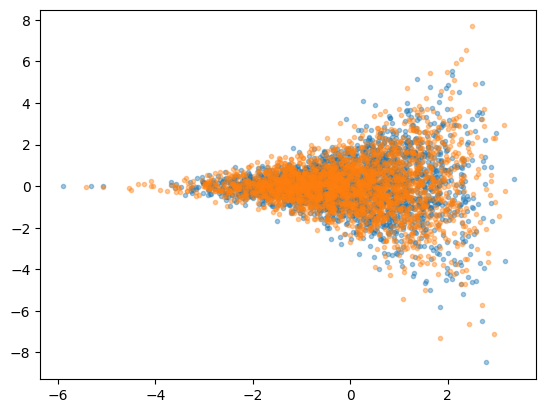

In [14]:
import matplotlib.pyplot as plt

ode_targ = out_dict[-1]["aug_ode"][:, -1,:2]
sde_targ = out_dict[-1]["aug"][:, -1,:2]

plt.plot(ode_targ[:, 0], ode_targ[:, 1], ".", alpha=0.4)
plt.plot(sde_targ[:, 0], sde_targ[:, 1], ".", alpha=0.4)

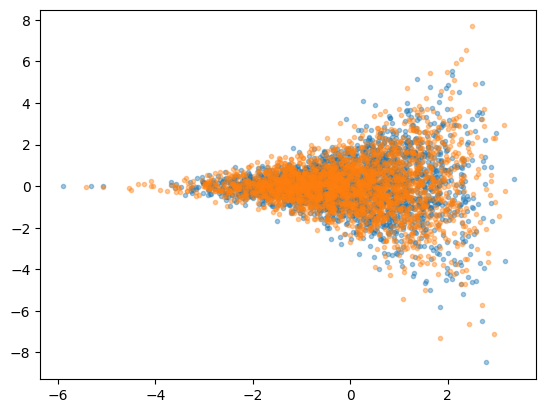

In [15]:
import matplotlib.pyplot as plt

timestep = 40

ode_targ = out_dict[-1]["aug_ode"][:, timestep,:2]
sde_targ = out_dict[-1]["aug"][:, timestep,:2]

plt.plot(ode_targ[:, 0], ode_targ[:, 1], ".", alpha=0.4)
plt.plot(sde_targ[:, 0], sde_targ[:, 1], ".", alpha=0.4)